## Tasks: Overrelaxation
<font size = 4>
We can use the following update
where  is a shorthand for the average nearest-neighbor potential and the parameter  is known as the overrelazation parameter.

 underrelaxation.
 overrelaxation.
 standard update.

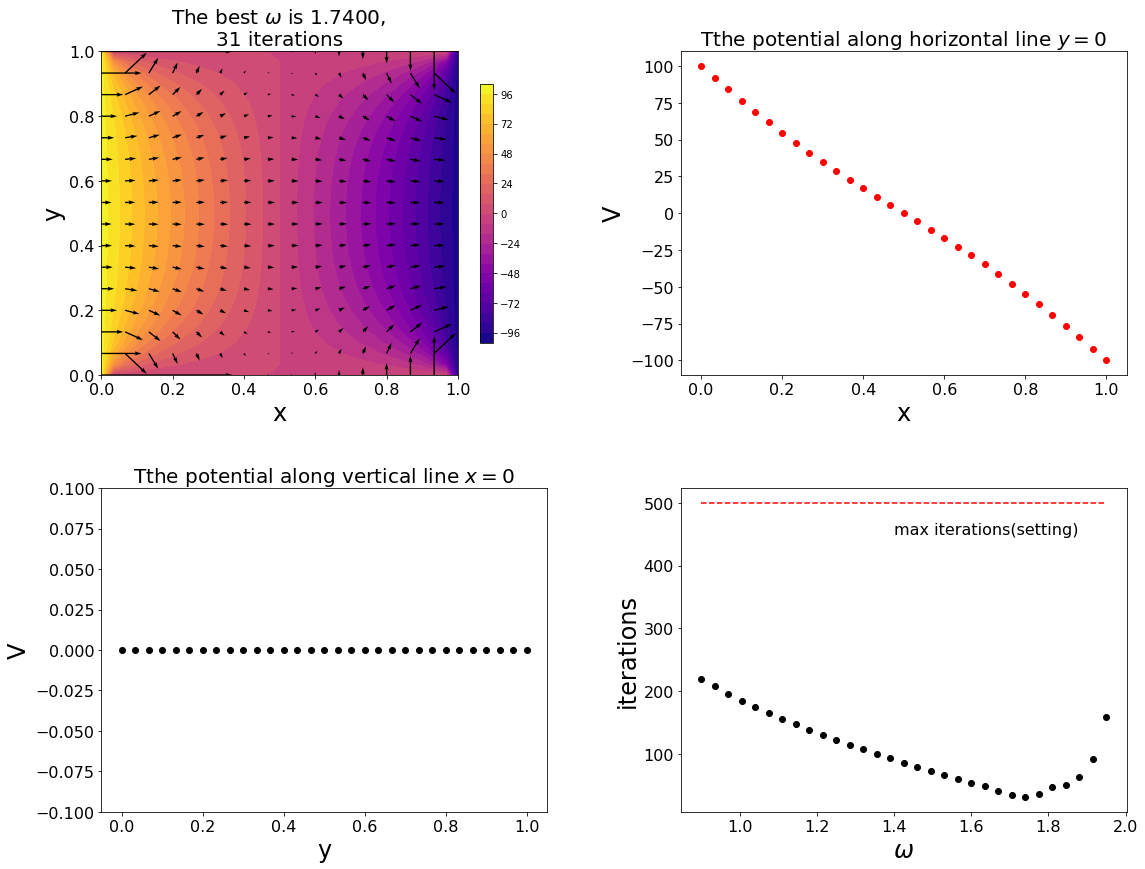

In [74]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
N = 31     # N means the number of equl points
it = 500
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))
Vold = np.zeros((N,N))
Vbest = np.zeros((N,N))

sx = np.zeros_like(x)
sy = np.zeros_like(y)
w = np.linspace(0.9,1.95,31)
number = np.zeros_like(w)
err = 0.0001
    
for k in range(len(w)):
    V[:,:] = np.zeros((N,N))
    for i in range(it):
        V[-1,:] = 0
        V[0,:] = 0
        V[:,-1] = -100
        V[:,0] = 100
        Vold[:,:] = V[:,:]
        
        for jy in range(1,N-1):
            for jx in range(1,int((N-1)/2)):
                V[jy,jx] = w[k]/4*(V[jy+1,jx] + V[jy-1,jx] + V[jy,jx+1] + V[jy,jx-1]) + (1-w[k])*V[jy,jx]
                V[jy,-jx-1] = w[k]/4*(V[jy+1,-jx-1] + V[jy-1,-jx-1] + V[jy,-jx] + V[jy,-jx-2]) + (1-w[k])*V[jy,-jx-1]
                
        for ii in range(1,N-1):
            V[ii,(N-1)//2] = w[k]/4*(V[ii+1,(N-1)//2] + V[ii-1,(N-1)//2] + V[ii,(N-1)//2+1] + V[ii,(N-1)//2-1])\
                            + (1-w[k])*V[ii,(N-1)//2]
            
        if(np.sum(np.abs(V-Vold))/np.sum(np.abs(Vold)) < err or i == it-1):
            number[k] = i+1
            if (k>0 and np.all(number[k] <= number[0:k])):
                Vbest[:,:] = V[:,:]
                best = w[k]
                bestn = number[k]
            break

V[:,:] = Vbest[:,:]
ax[3].plot(w,number,'ko')
ax[3].plot([w[0],w[-1]],[it,it],'r--')

sy = V[: , int((N-1)/2)]
sx = V[int((N-1)/2) , :]
ax[1].plot(x,sx,'ro')
ax[2].plot(y,sy,'ko')

contour = ax[0].contourf(X,Y,V,30,cmap='plasma')
fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[0])
ax[0].set_title('The best $\omega $ is ' + '%.4f' %best + ', \n' + str(int(bestn)) + ' iterations',fontsize = 20)
ax[1].set_title('The potential along horizontal line $y = 0$',fontsize = 20)
ax[2].set_title('The potential along vertical line $x = 0$',fontsize = 20)

Ey, Ex = np.gradient(-V)
skip=(slice(None,None,2),slice(None,None,2))
ax[0].quiver(X[skip],Y[skip],Ex[skip],Ey[skip],color = 'k')
# ax[0].streamplot(x,y,Ex,Ey,density = 1,color = 'k')


plt.subplots_adjust(left=0.09,
                    bottom=0.06, 
                    right=0.98, 
                    top=0.94, 
                    wspace=0.3, 
                    hspace=0.35)

ax[0].set_xlabel('x',fontsize = 24)
ax[0].set_ylabel('y',fontsize = 24)
ax[1].set_xlabel('x',fontsize = 24)
ax[1].set_ylabel('V',fontsize = 24)
ax[2].set_xlabel('y',fontsize = 24)
ax[2].set_ylabel('V',fontsize = 24)
ax[3].set_xlabel(r'$\omega$',fontsize = 24)
ax[3].set_ylabel('iterations',fontsize = 24)
ax[0].set_ylim([0,1])
ax[2].set_ylim([-0.1,0.1])
ax[3].text(1.4,450,'max iterations(setting)',fontsize = 16)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='major', labelsize=16)
ax[3].tick_params(axis='both', which='major', labelsize=16)
plt.savefig('fig3.pdf')

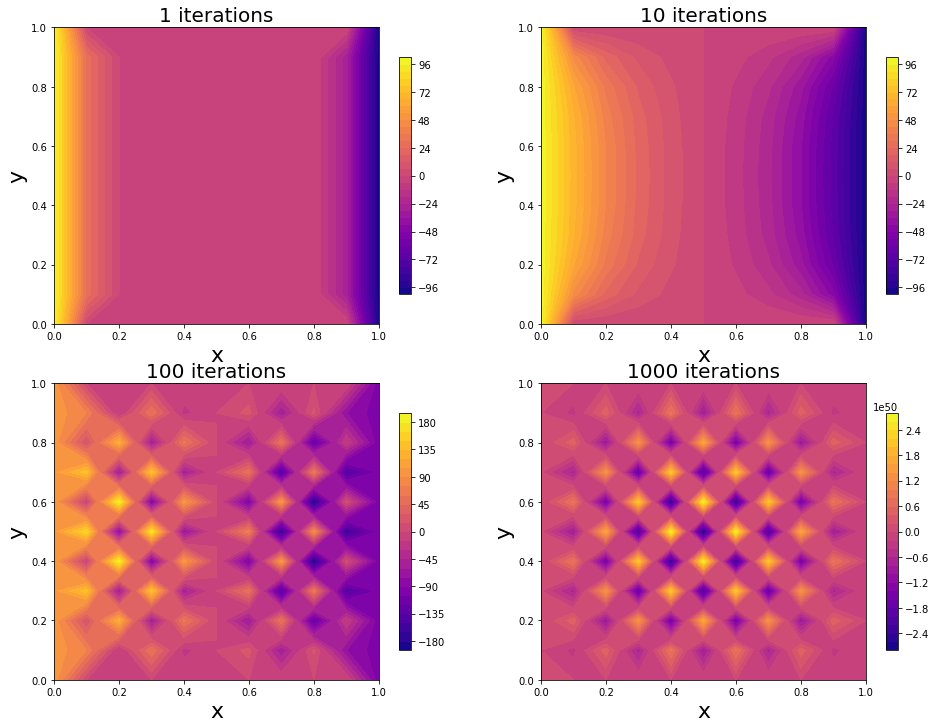

In [67]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
N = 11     # N means the number of equl points
it = 1
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))
w = 1.1

for k in range(4):
    V[-1,:] = 0
    V[0,:] = 0
    V[:,-1] = -100
    V[:,0] = 100
    for i in range(it*10**k):    # relaxation
        V[1:-1,1:-1] = w/4*(V[2:,1:-1] + V[0:-2,1:-1] + V[1:-1,2:] + V[1:-1,0:-2]) + (1-w)*V[1:-1,1:-1]
    
    contour = ax[k].contourf(X,Y,V,35,cmap='plasma')
    fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[k])
    ax[k].set_title(str(int(it*10**k)) + ' iterations',fontsize = 20)
    ax[k].set_xlabel('x',fontsize = 22)
    ax[k].set_ylabel('y',fontsize = 22)
    
plt.savefig('fig2.pdf')

## Tasks: Multigrid methods
<font size = 4>
Consider a squre boundary.

Starting with  points (including the boundary point) in each direction.
Iterate a copule of times then perform the prologation from the coarse grid  to the find grid .
Repeat the same procedue until you reach the finest grid with  points, where  is assinged by you.
Compre to a standard simulation with , which way converges faster?

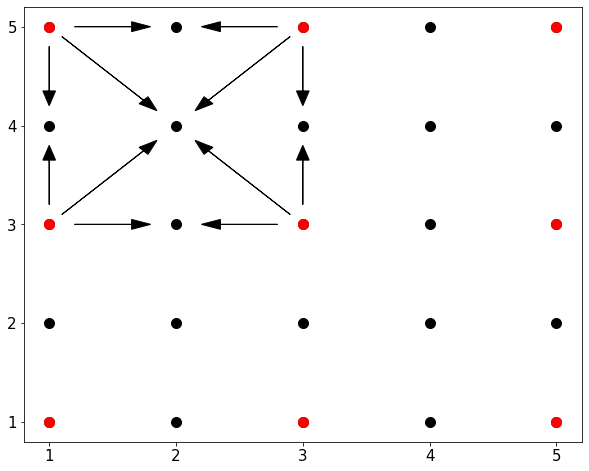

In [116]:
plt.figure(figsize = (10,8))
ax = plt.axes()
x = np.arange(1,6)
y = np.arange(1,6)
x1 = np.arange(1,6,2)
y1 = np.arange(1,6,2)
X, Y = np.meshgrid(x, y, indexing = 'xy')
X1, Y1 = np.meshgrid(x1, y1, indexing = 'xy')
ax.plot(X,Y,'ko',markersize =10)
ax.plot(X1,Y1,'ro',markersize =10)
ax.set_xticks(x)
ax.set_yticks(y)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.arrow(1,4.8,0,-0.6,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(1,3.2,0,0.6,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(3,4.8,0,-0.6,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(3,3.2,0,0.6,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(1.1,3.1,0.75,0.75,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(2.9,3.1,-0.75,0.75,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(1.1,4.9,0.75,-0.75,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(2.9,4.9,-0.75,-0.75,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(1.2,3,0.6,0,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(2.8,3,-0.6,0,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(1.2,5,0.6,0,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
ax.arrow(2.8,5,-0.6,0,width = 0.001,head_width = 0.1,length_includes_head = True,color ='k')
plt.savefig('fig4.pdf')

Using mutigrid method, the deffrence less than 0.005% needs 413 iterations
Using relaxation method, the deffrence less than 0.005% needs 6568 iterations


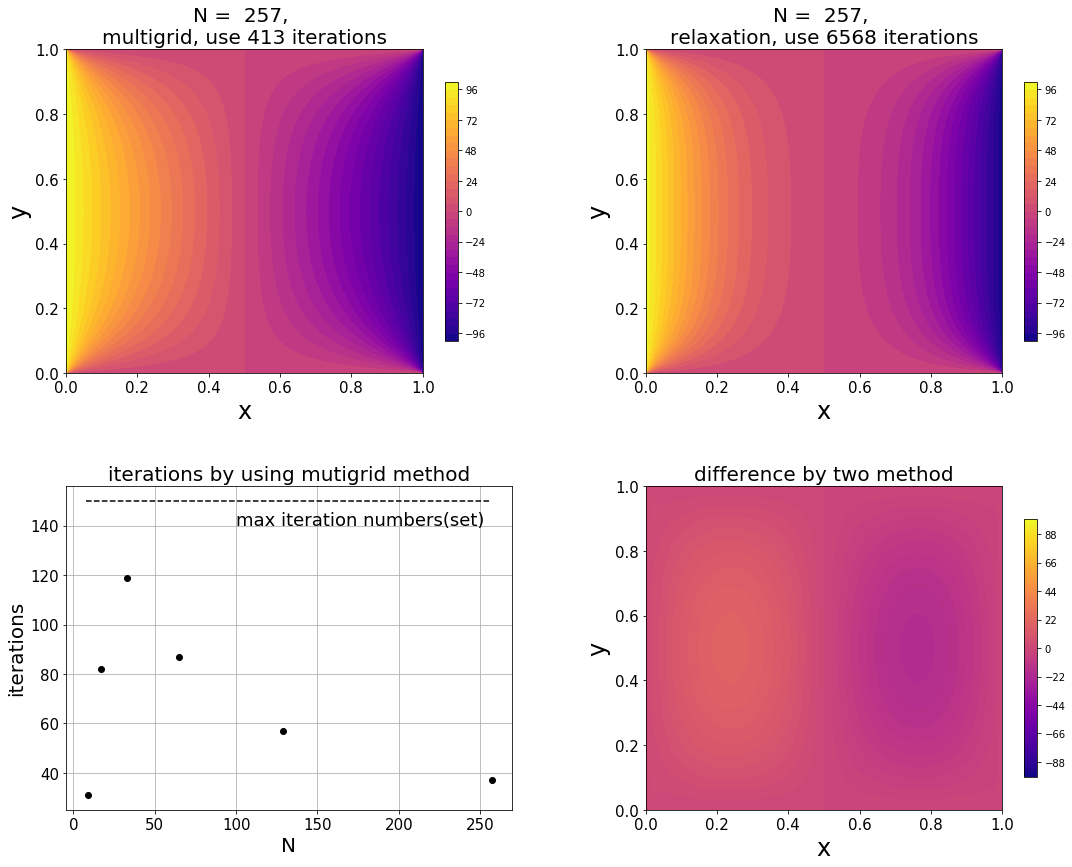

In [136]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
plt.subplots_adjust(left=0.09,
                    bottom=0.06, 
                    right=0.98, 
                    top=0.94, 
                    wspace=0.3, 
                    hspace=0.35)
n = np.arange(3,9)
Vold = np.zeros((2**(n[0]-1)+1,2**(n[0]-1)+1))
it = 150
number = np.zeros_like(n)
err = 0.00005
change1 = list()
change2 = list()
########################################################  ↓ ↓ ↓ main code for mutigrid method
for k in range(len(n)):            
    N = 2**n[k]+1     # N means the number of equl points
    V = np.zeros((N,N))     # new V
    Vc = np.ones((N,N))*100

    V[-1,:] = 0
    V[0,:] = 0
    V[:,-1] = -100
    V[:,0] = 100
    Vold[-1,:] = 0
    Vold[0,:] = 0
    Vold[:,-1] = -100
    Vold[:,0] = 100
    
    V[::2,::2] = Vold
    V[1:-1,1:-1] = 1/2*(V[2:,1:-1] + V[0:-2,1:-1] + V[1:-1,2:] + V[1:-1,0:-2]) + 1/4*(V[2:,2:] + V[2:,0:-2] + V[0:-2,2:] +V[0:-2,0:-2])
    V[::2,::2] = Vold
   
    for i in range(it):
        V[1:-1,1:-1] = 1/4*(V[2:,1:-1] + V[0:-2,1:-1] + V[1:-1,2:] + V[1:-1,0:-2])
        change1.append(np.sum(np.abs(V-Vc))/np.sum(np.abs(Vc)))
        if(np.sum(np.abs(V-Vc))/np.sum(np.abs(Vc)) < err or i == it-1):
            number[k] = i+1
            break
            
        Vc[:,:] = V[:,:]
    Vold = np.zeros((N,N))
    Vold = V
######################################################## ↑ ↑ ↑ main code for mutigrid method

V1 = np.zeros((N,N))
V1[:,:] = V[:,:]
ax[2].plot(2**n+1,number,'ko')
ax[2].plot([2**n[0],2**n[-1]],[it,it],'k--')
ax[2].text(100,140,'max iteration numbers(set)',fontsize = 18)
print('Using mutigrid method, the deffrence less than ' + str('%.1g' %(err*100)) + '% needs ' + str(np.sum(number)) + ' iterations')

######################################################## 

x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'xy')
contour = ax[0].contourf(X,Y,V,35,cmap='plasma')
fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[0])
ax[0].set_title('N =  ' + str(N) + ', \n' + 'multigrid, use ' + str(np.sum(number)) + ' iterations',fontsize = 20)

it = 10000
V = np.zeros((N,N))
Vc = np.zeros((N,N))
V2 = np.zeros((N,N))
V[-1,:] = 0
V[0,:] = 0
V[:,-1] = -100
V[:,0] = 100
Vc[-1,:] = 0
Vc[0,:] = 0
Vc[:,-1] = -100
Vc[:,0] = 100


######################################################## ↓ ↓ ↓ main code for relaxation method
number2 = it
for i in range(it):    # relaxation
    V[1:-1,1:-1] = 1/4*(V[2:,1:-1] + V[0:-2,1:-1] + V[1:-1,2:] + V[1:-1,0:-2])
    change2.append(np.sum(np.abs(V-Vc))/np.sum(np.abs(Vc)))
    if(np.sum(np.abs(V-Vc))/np.sum(np.abs(Vc)) < err):
        number2 = i+1
        break
    Vc[:,:]= V[:,:]
######################################################## ↑ ↑ ↑ main code for relaxation method
V2[:,:] = V[:,:]
contour = ax[3].contourf(X,Y,(V1-V2),100,cmap='plasma',levels = np.linspace(-100,100,101))
fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[3])


print('Using relaxation method, the deffrence less than ' + str('%.1g' %(err*100)) + '% needs ' + str('%.d' %(number2)) + ' iterations')
contour = ax[1].contourf(X,Y,V,35,cmap='plasma')
fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[1])
ax[1].set_title('N =  ' + str(N) + ', \n' + 'relaxation, use ' + str('%.d' %(number2)) + ' iterations',fontsize = 20)
ax[2].set_title('iterations by using mutigrid method',fontsize = 20)
ax[3].set_title('difference by two method',fontsize = 20)
ax[2].set_xlabel('N',fontsize = 20)
ax[2].set_ylabel('iterations',fontsize = 20)

ax[0].set_xlabel('x',fontsize = 24)
ax[0].set_ylabel('y',fontsize = 24)
ax[1].set_xlabel('x',fontsize = 24)
ax[1].set_ylabel('y',fontsize = 24)
ax[3].set_xlabel('x',fontsize = 24)
ax[3].set_ylabel('y',fontsize = 24)
ax[2].grid()
for k in range(4):
    ax[k].tick_params(axis='both', which='major', labelsize=15)
plt.savefig('fig5.pdf')

<font size = 4>
Form the above figure, one can find that the results of two method is still quite defferent although the potential change percaentages are both less than 0.005%.<br><br>
I think it is because the chage percentage is calculated by the sum of the potential everywhere, however, the speed of converge of relaxation method is much slower than mutigrid so that the relaxation method is still not converge to a satisfying result.

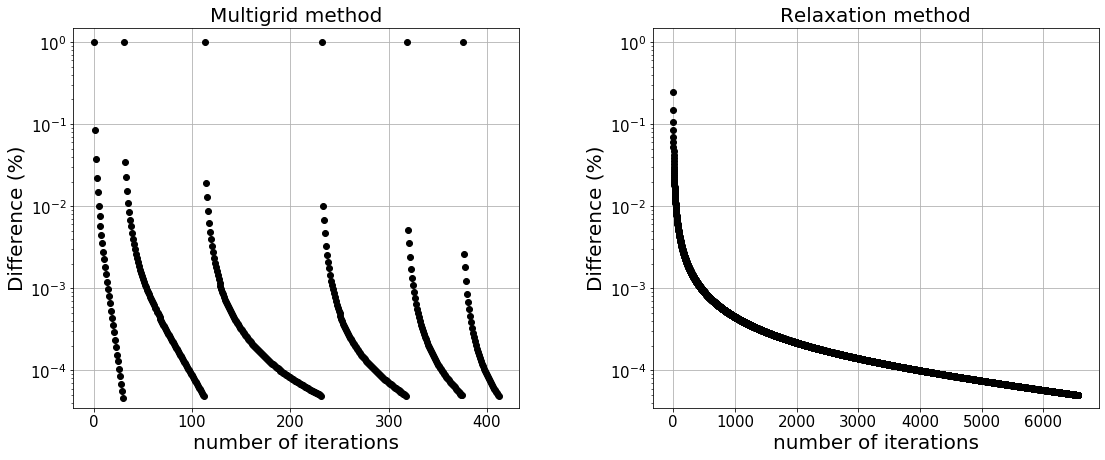

In [150]:
fig, axes = plt.subplots(ncols = 2 , nrows = 1, figsize = (16,6))
ax = axes.flatten()
ax[0].plot(change1,'ko')
ax[1].plot(change2,'ko')
ax[0].set_ylim([0.000035,1.5])
ax[1].set_ylim([0.000035,1.5])
ax[0].set_yscale('log')
# ax[0].set_xscale('log')
ax[1].set_yscale('log')
# ax[1].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[0].set_xlabel('number of iterations',fontsize = 20)
ax[1].set_xlabel('number of iterations',fontsize = 20)
ax[0].set_ylabel('Difference (%)',fontsize = 20)
ax[1].set_ylabel('Difference (%)',fontsize = 20)
ax[0].set_title('Multigrid method',fontsize = 20)
ax[1].set_title('Relaxation method',fontsize = 20)
ax[0].grid()
ax[1].grid()
plt.subplots_adjust(left=0.09,
                    bottom=0.06, 
                    right=0.98, 
                    top=0.94, 
                    wspace=0.3, 
                    hspace=0.35)
plt.savefig('fig6.pdf')

## Tasks: Arbitrary boundary shapes
<font size = 4>
Consider a circle with radius $r = 1$ . Set the potential on the circle to be  and put a point charge at the center. Using the generalization to the arbitrary boundary shapes to find the potential inside the circle.<br><br><br><br><br>

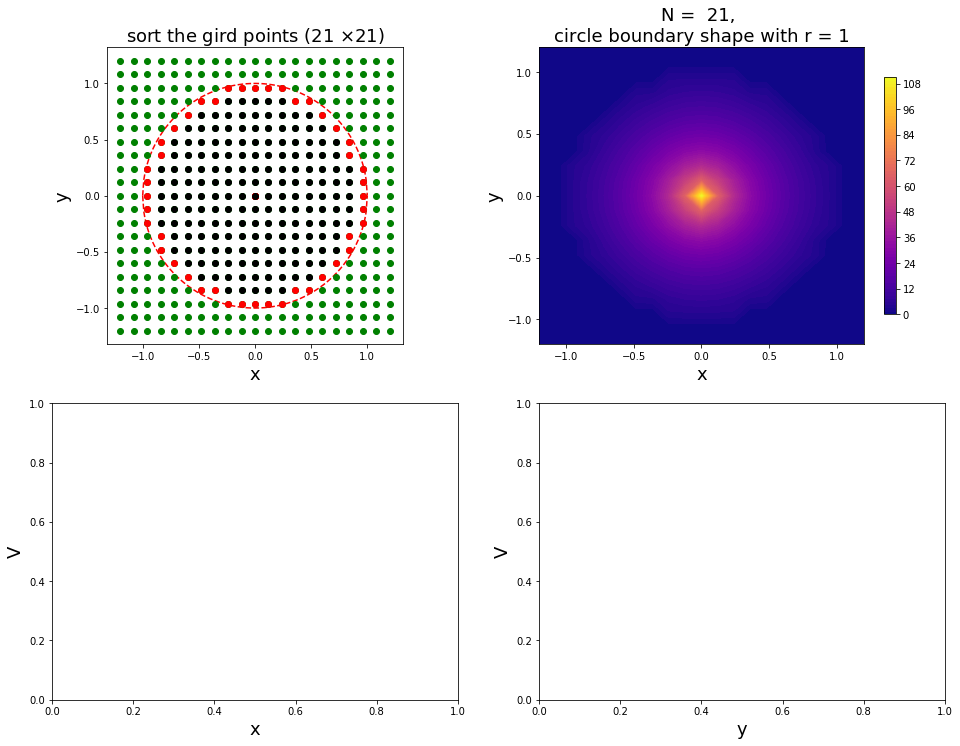

In [162]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
N = 21     # N means the number of equl points
it = 500
x = np.linspace(-1.2,1.2,N)
y = np.linspace(-1.2,1.2,N)
h = (x[-1]-x[0])/(N-1)
xc = np.linspace(-1,1,200)
yc = np.linspace(-1,1,200)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
C = np.zeros((N,N))
a = np.zeros((N,N))
b = np.zeros((N,N))
up = np.zeros((N,N))
down = np.zeros((N,N))
right = np.zeros((N,N))
left = np.zeros((N,N))
Ka = np.zeros((N,N))
Kb = np.zeros((N,N))
M = np.zeros((N,N))

V0 = 4
ρ = np.zeros((N,N))
ρ[int((N-1)/2),int((N-1)/2)] = 1000
h = (x[N-1]-x[0])/(N-1)
ρρ = np.pi*h**2*ρ

########################################################  ↓ ↓ ↓ main code for setting the condition
for i in range(N):
    for j in range(N):
        A[i,j] = np.sqrt(x[j]**2 + y[i]**2)
ax[0].plot(xc,np.sqrt(1-xc**2),'r--')
ax[0].plot(xc,-np.sqrt(1-xc**2),'r--')

filter = A < 1
for i in range(1,N-1):
    for j in range(1,N-1):
        if(filter[j+1,i]==True and filter[j-1,i]==True and filter[j,i+1]==True and filter[j,i-1]==True):
            B[j,i] = 1
            a[j,i] = 1
            b[j,i] = 1
        elif(filter[j+1,i]==False and filter[j-1,i]==False and filter[j,i+1]==False and filter[j,i-1]==False):
            B[j,i] = 0
            C[j,i] = 0
        elif(filter[j,i]==True and(filter[j+1,i]==False or filter[j-1,i]==False or filter[j,i+1]==False or filter[j,i-1]==False)):
            C[j,i] = 1
            
            if(np.abs(np.sqrt(1-y[j]**2)- x[i]) < np.abs(-np.sqrt(1-y[j]**2)- x[i])):
                a[j,i] = np.abs(np.sqrt(1-y[j]**2)- x[i])
                right[j,i] = 1
            else:
                a[j,i] = np.abs(-np.sqrt(1-y[j]**2)- x[i])
                left[j,i] = 1
            if(np.abs(np.sqrt(1-x[i]**2)- y[j]) < np.abs(-np.sqrt(1-x[i]**2)- y[j])):
                b[j,i] = np.abs(np.sqrt(1-x[i]**2)- y[j])
                up[j,i] = 1
            else:
                b[j,i] = np.abs(-np.sqrt(1-x[i]**2)- y[j])
                down[j,i] = 1
            if (np.abs(a[j,i]) >= h):
                a[j,i] = 0
            if (np.abs(b[j,i]) >= h):
                b[j,i] = 0
        else:
            B[j,i] = 0
            C[j,i] = 0

for i in range(1,N-1):
    for j in range(1,N-1):
        if(a[j,i] != 0 and a[j,i] != 1):
            Ka[j,i] = a[j,i]*b[j,i]/((a[j,i]+b[j,i])*(1+a[j,i]))
        if(b[j,i] != 0 and b[j,i] != 1):
            Kb[j,i] = a[j,i]*b[j,i]/((a[j,i]+b[j,i])*(1+b[j,i]))
        if((a[j,i] != 0 and a[j,i] != 1) or (b[j,i] != 0 and b[j,i] != 1)):
            M[j,i] = (b[j,i]/(1+a[j,i]) + a[j,i]/(1+b[j,i]))/(a[j,i]+b[j,i])

######################################################## ↑ ↑ ↑ main code for setting the condition

ax[0].plot(X,Y,'go')
ax[0].plot(X*B,Y*B,'ko')
ax[0].plot(X*C,Y*C,'ro')
ax[0].plot(0,0,'ko')


## A is the distance from origin, B is normal points inside boundary, C is points that close to boundary and inside boundary.

########################################################  ↓ ↓ ↓ main code for relaxation
for i in range(it):
    V[1:-1,1:-1] = 1/4*B[1:-1,1:-1]*(V[2:,1:-1] + V[0:-2,1:-1] + V[1:-1,2:] + V[1:-1,0:-2])\
                    + ρρ[1:-1,1:-1]\
                    + C[1:-1,1:-1]*(Ka[1:-1,1:-1]*(right[1:-1,1:-1]*V[1:-1,2:] + left[1:-1,1:-1]*V[1:-1,0:-2])\
                                  + Kb[1:-1,1:-1]*(up[1:-1,1:-1]*V[2:,1:-1] + down[1:-1,1:-1]*V[0:-2,1:-1]))\
                    + M[1:-1,1:-1]*V0

######################################################## ↑ ↑ ↑ main code for relaxation

contour = ax[1].contourf(X,Y,V,100,cmap='plasma')
fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[1])
# sx = V[int((N-1)/2),:]
# sy = V[int((N-1)/2 + 25),:]
# ax[2].plot(x,sx,'ko')
# ax[3].plot(y,sy,'ko')
ax[0].set_aspect('equal', adjustable='box')
# ax[1].plot([x[0],x[-1]],[y[int((N-1)/2)],y[int((N-1)/2)]],'r--')
# ax[1].plot([x[int((N-1)/2) + 25],x[int((N-1)/2 + 25)]],[y[0],y[-1]],'r--')

ax[0].set_xlabel('x',fontsize = 18)
ax[0].set_ylabel('y',fontsize = 18)
ax[1].set_xlabel('x',fontsize = 18)
ax[1].set_ylabel('y',fontsize = 18)
ax[2].set_xlabel('x',fontsize = 18)
ax[2].set_ylabel('V',fontsize = 18)
ax[3].set_xlabel('y',fontsize = 18)
ax[3].set_ylabel('V',fontsize = 18)

ax[0].set_title('sort the gird points (' + str(int(N)) + r' $\times $' + str(int(N)) + ')', fontsize = 18)
ax[1].set_title('N =  ' + str(N) + ', \n' + 'circle boundary shape with r = 1',fontsize = 18)
extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('fig7.pdf', bbox_inches=extent.expanded(1.15, 1.25))


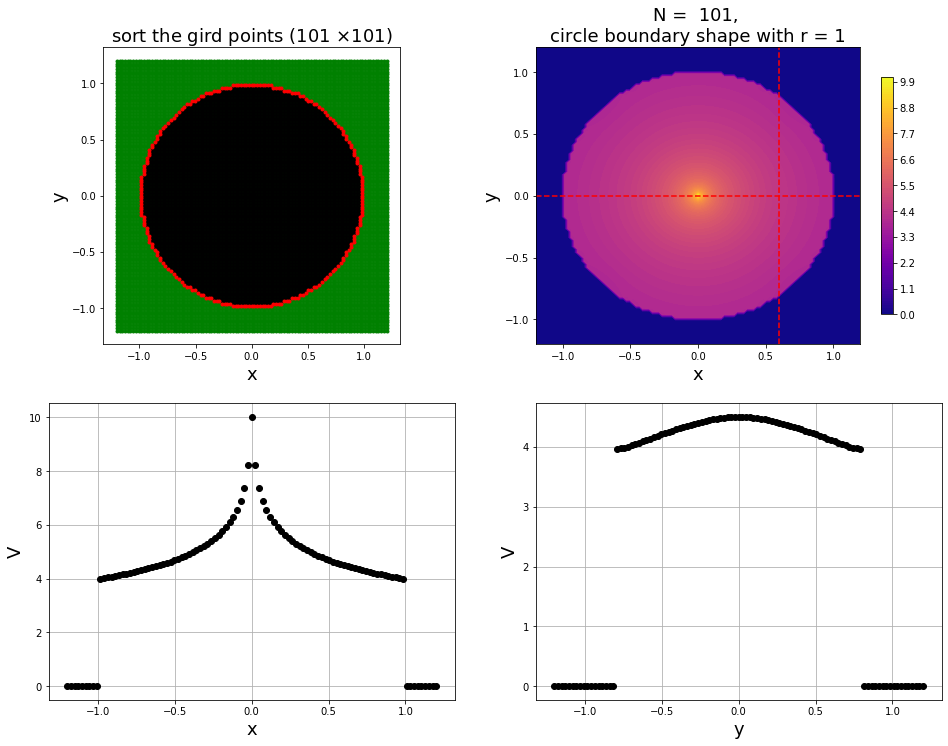

In [164]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
N = 101     # N means the number of equl points
it = 5000
x = np.linspace(-1.2,1.2,N)
y = np.linspace(-1.2,1.2,N)
h = (x[-1]-x[0])/(N-1)
xc = np.linspace(-1,1,200)
yc = np.linspace(-1,1,200)
X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros((N,N))
A = np.zeros((N,N))
B = np.zeros((N,N))
C = np.zeros((N,N))
a = np.zeros((N,N))
b = np.zeros((N,N))
up = np.zeros((N,N))
down = np.zeros((N,N))
right = np.zeros((N,N))
left = np.zeros((N,N))
Ka = np.zeros((N,N))
Kb = np.zeros((N,N))
M = np.zeros((N,N))

V0 = 4
ρ = np.zeros((N,N))
ρ[int((N-1)/2),int((N-1)/2)] = 1000
h = (x[N-1]-x[0])/(N-1)
ρρ = np.pi*h**2*ρ

########################################################  ↓ ↓ ↓ main code for setting the condition
for i in range(N):
    for j in range(N):
        A[i,j] = np.sqrt(x[j]**2 + y[i]**2)
ax[0].plot(xc,np.sqrt(1-xc**2),'r--')
ax[0].plot(xc,-np.sqrt(1-xc**2),'r--')

filter = A < 1
for i in range(1,N-1):
    for j in range(1,N-1):
        if(filter[j+1,i]==True and filter[j-1,i]==True and filter[j,i+1]==True and filter[j,i-1]==True):
            B[j,i] = 1
            a[j,i] = 1
            b[j,i] = 1
        elif(filter[j+1,i]==False and filter[j-1,i]==False and filter[j,i+1]==False and filter[j,i-1]==False):
            B[j,i] = 0
            C[j,i] = 0
        elif(filter[j,i]==True and(filter[j+1,i]==False or filter[j-1,i]==False or filter[j,i+1]==False or filter[j,i-1]==False)):
            C[j,i] = 1
            
            if(np.abs(np.sqrt(1-y[j]**2)- x[i]) < np.abs(-np.sqrt(1-y[j]**2)- x[i])):
                a[j,i] = np.abs(np.sqrt(1-y[j]**2)- x[i])
                right[j,i] = 1
            else:
                a[j,i] = np.abs(-np.sqrt(1-y[j]**2)- x[i])
                left[j,i] = 1
            if(np.abs(np.sqrt(1-x[i]**2)- y[j]) < np.abs(-np.sqrt(1-x[i]**2)- y[j])):
                b[j,i] = np.abs(np.sqrt(1-x[i]**2)- y[j])
                up[j,i] = 1
            else:
                b[j,i] = np.abs(-np.sqrt(1-x[i]**2)- y[j])
                down[j,i] = 1
            if (np.abs(a[j,i]) >= h):
                a[j,i] = 0
            if (np.abs(b[j,i]) >= h):
                b[j,i] = 0
        else:
            B[j,i] = 0
            C[j,i] = 0

for i in range(1,N-1):
    for j in range(1,N-1):
        if(a[j,i] != 0 and a[j,i] != 1):
            Ka[j,i] = a[j,i]*b[j,i]/((a[j,i]+b[j,i])*(1+a[j,i]))
        if(b[j,i] != 0 and b[j,i] != 1):
            Kb[j,i] = a[j,i]*b[j,i]/((a[j,i]+b[j,i])*(1+b[j,i]))
        if((a[j,i] != 0 and a[j,i] != 1) or (b[j,i] != 0 and b[j,i] != 1)):
            M[j,i] = (b[j,i]/(1+a[j,i]) + a[j,i]/(1+b[j,i]))/(a[j,i]+b[j,i])

######################################################## ↑ ↑ ↑ main code for setting the condition

ax[0].plot(X,Y,'g.')
ax[0].plot(X*B,Y*B,'k.')
ax[0].plot(X*C,Y*C,'r.')
ax[0].plot(0,0,'ko')


## A is the distance from origin, B is normal points inside boundary, C is points that close to boundary and inside boundary.

########################################################  ↓ ↓ ↓ main code for relaxation
for i in range(it):
    V[1:-1,1:-1] = 1/4*B[1:-1,1:-1]*(V[2:,1:-1] + V[0:-2,1:-1] + V[1:-1,2:] + V[1:-1,0:-2])\
                    + ρρ[1:-1,1:-1]\
                    + C[1:-1,1:-1]*(Ka[1:-1,1:-1]*(right[1:-1,1:-1]*V[1:-1,2:] + left[1:-1,1:-1]*V[1:-1,0:-2])\
                                  + Kb[1:-1,1:-1]*(up[1:-1,1:-1]*V[2:,1:-1] + down[1:-1,1:-1]*V[0:-2,1:-1]))\
                    + M[1:-1,1:-1]*V0

######################################################## ↑ ↑ ↑ main code for relaxation

contour = ax[1].contourf(X,Y,V,100,cmap='plasma')
fig.colorbar(contour, shrink=0.8, aspect=20,ax=ax[1])
sx = V[int((N-1)/2),:]
sy = V[int((N-1)/2 + 25),:]
ax[2].plot(x,sx,'ko')
ax[3].plot(y,sy,'ko')
ax[0].set_aspect('equal', adjustable='box')
ax[1].plot([x[0],x[-1]],[y[int((N-1)/2)],y[int((N-1)/2)]],'r--')
ax[1].plot([x[int((N-1)/2) + 25],x[int((N-1)/2 + 25)]],[y[0],y[-1]],'r--')

ax[0].set_xlabel('x',fontsize = 18)
ax[0].set_ylabel('y',fontsize = 18)
ax[1].set_xlabel('x',fontsize = 18)
ax[1].set_ylabel('y',fontsize = 18)
ax[2].set_xlabel('x',fontsize = 18)
ax[2].set_ylabel('V',fontsize = 18)
ax[3].set_xlabel('y',fontsize = 18)
ax[3].set_ylabel('V',fontsize = 18)
ax[2].grid()
ax[3].grid()
ax[0].set_title('sort the gird points (' + str(int(N)) + r' $\times $' + str(int(N)) + ')', fontsize = 18)
ax[1].set_title('N =  ' + str(N) + ', \n' + 'circle boundary shape with r = 1',fontsize = 18)
plt.savefig('fig8.pdf')

## Confirm the symmetry

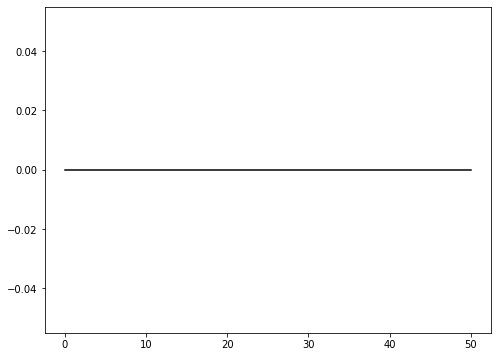

In [5]:
plt.figure(figsize = (8,6))
rev = sx[::-1]
plt.plot(sy[0:int((N+1)/2)] - sy[0:int((N+1)/2)],'k')

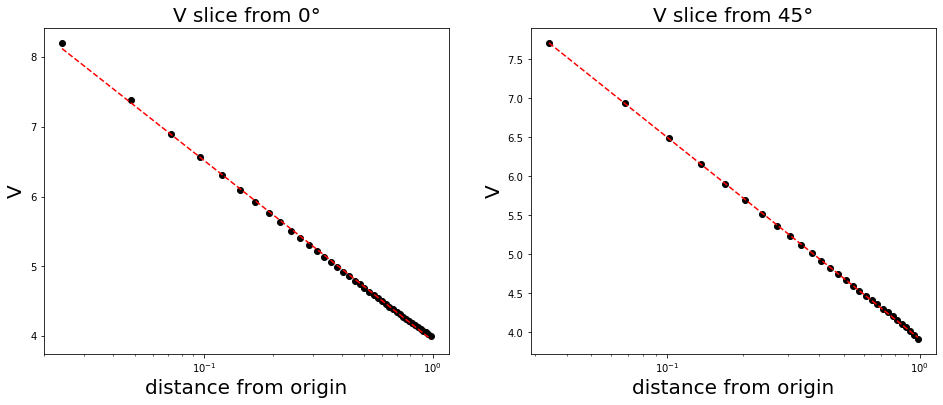

In [165]:
fig, axes = plt.subplots(ncols = 2 , nrows = 1, figsize = (16,6))
ax = axes.flatten()
xfit = sx[int((N-1)/2)+1:-9]
mfit = np.zeros(N)
r = np.zeros(N)

for i in range (N):
    mfit[i] = V[i,i]
    r[i] = np.sqrt(x[i]**2 + y[i]**2)
    
ax[0].plot(x[int((N-1)/2)+1:-9],xfit,'ko')
ax[1].plot(r[int((N-1)/2)+1:-21],mfit[int((N-1)/2)+1:-21],'ko')

f1 = np.polyfit(np.log(x[int((N-1)/2)+1:-9]),xfit,1)
f2 = np.polyfit(np.log(r[int((N-1)/2)+1:-21]),mfit[int((N-1)/2)+1:-21],1)

ax[0].plot(x[int((N-1)/2)+1:-9], f1[0]*np.log(x[int((N-1)/2)+1:-9]) + f1[1],'r--',label = 'fitting line')
ax[1].plot(r[int((N-1)/2)+1:-21],f2[0]*np.log(r[int((N-1)/2)+1:-21]) + f2[1],'r--',label = 'fitting line')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_xlabel('distance from origin',fontsize = 20)
ax[0].set_ylabel('V',fontsize = 20)
ax[1].set_xlabel('distance from origin',fontsize = 20)
ax[1].set_ylabel('V',fontsize = 20)
ax[0].set_title('V slice from 0°',fontsize = 20)
ax[1].set_title('V slice from 45°',fontsize = 20)
plt.savefig('fig9.pdf')